# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定【data的資料夾路徑】，命名為【data_folder】
data_folder = 'C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data'

# 設定t001為某個data路徑
# 設定t002為pd裡read data的功能
# 註釋一下路徑位置，%s參數(和%d)的使用方法與限制，參考learning。
t001 = os.path.join(data_folder, 'application_train.csv')
t002 = pd.read_csv(t001)
print('Path of read in data: %s' %t001)
print(t002.shape)
t002.head()

Path of read in data: C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data\application_train.csv
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [3]:
# 1
# 建立一個【cut_rule集合】，留意一下inf的正負符號和用法
cut_rule = [-np.inf, 0, 2, 5, np.inf]

# pd.cut的運用
# 創建新欄位：CNT_CHILDREN_GROUP
t002['CNT_CHILDREN_GROUP'] = pd.cut(t002['CNT_CHILDREN'].values, cut_rule, include_lowest=True)

#.value_counts()的運用
t002['CNT_CHILDREN_GROUP'].value_counts()

(-inf, 0.0]    215371
(0.0, 2.0]      87868
(2.0, 5.0]       4230
(5.0, inf]         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [4]:
# 2-1
# 這邊不知道為什麼要用TARGET這個欄位(本來就在資料裡的欄位)
# grp這樣看起來是選了兩個欄位，類似select的概念吧!?
# 對，groupby(grp)，group by cola, colb的概念沒錯
# 什麼東西被groupby？AMT_INCOME_TOTAL
# group by之後要用什麼算？mean去算。

"""
SQL語法如下：
select 
"CNT_CHILDREN_GROUP",
"TARGET",
ROUND(AVG("AMT_INCOME_TOTAL"::NUMERIC),6)
from(
select *,
CASE
WHEN "CNT_CHILDREN"::INT <=0 THEN '0個'
WHEN "CNT_CHILDREN"::INT <=2 THEN '1,2個'
WHEN "CNT_CHILDREN"::INT <=5 THEN '3,4,5個'
ELSE '5個以上' END "CNT_CHILDREN_GROUP"
from application_train
) a
group by
"CNT_CHILDREN_GROUP",
"TARGET"
order by "CNT_CHILDREN_GROUP","TARGET"
"""

grp = ['CNT_CHILDREN_GROUP', 'TARGET']
t003 = t002.groupby(grp)['AMT_INCOME_TOTAL']
t003.mean()

CNT_CHILDREN_GROUP  TARGET
(-inf, 0.0]         0         166747.010980
                    1         160804.210548
(0.0, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, inf]          0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

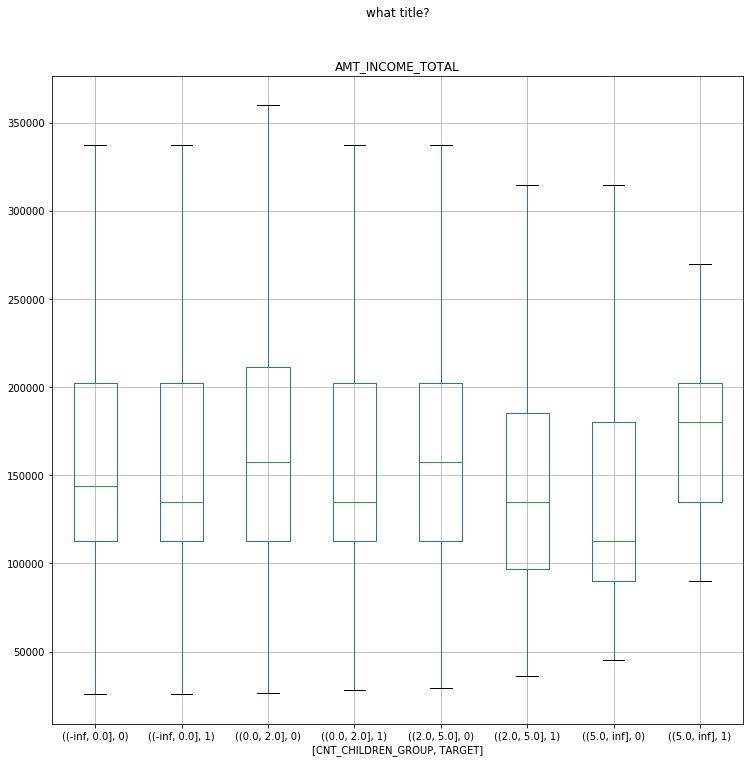

In [5]:
# 2-2
# 將4*2=8個群畫成圖形

# 要拉成值的measure欄位是【AMT_INCOME_TOTAL】
plt_column = 'AMT_INCOME_TOTAL'

# 要展開的dimension欄位是【CNT_CHILDREN_GROUP & TARGET】
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

# 設定boxplot的參數【拉成值,展開,是否顯示異常值？,呈現出來的圖形大小】
t002.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))

#設定標題
plt.suptitle('what title?')

# 秀圖
plt.show()

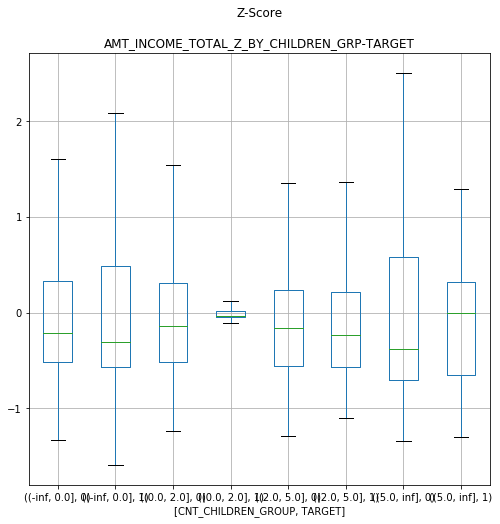

In [6]:
# 3
# 留意Z-Score的寫法
# 創建欄位
t002['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = t003.apply(lambda x:(x-np.mean(x))/np.std(x))

# 來試試新創出來的欄位，套如上圖參數
plt_column = 'AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']
t002.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(8,8))
plt.suptitle('Z-Score')
plt.show()

### Day8教材方向和目標
1. 如何建立並應用切分點的集合(cut_rule)，【inf、cut】的運用。
2. value_counts()的運用，=SUM(1)
3. mean()的運用，=AVG(col)
4. sum()的運用，=SUM(col)
5. groupby的寫法，=group by
6. [boxplot](https://www.kesci.com/home/project/59f6ec6dc5f3f511952c228e)的參數及用法、suptitle
7. [Z 轉換](https://en.wikipedia.org/wiki/Standard_score)的寫法

### Day8忽略部分
1. apply(lambda)的意義與用法
2. boxplot可以利用showfliers去控制異常值？是控制null還是極端值？
3. 這種呈現顯然很醜啊，如何更改分類命名？
(-inf, 0.0]    215371
(0.0, 2.0]      87868
(2.0, 5.0]       4230
(5.0, inf]         42
 
### Day8其他補充
已經快要習慣解答一貫的【不解釋、不多說，自己去找答案！】的態度。唉...